# HW8_jz3309_1

# Make a Geographic Heatmap using data from NYPD Motor Vehicle Collision.

In [1]:
import os
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import json
from IPython.display import Image
import geopandas as gpd
import pandas as pd
import numpy as np
import urllib
import requests
import os
import io
import json
import pylab as pl
import shapely
from fiona.crs import from_epsg

%pylab inline


Populating the interactive namespace from numpy and matplotlib


!curl https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD > NYPDMotorVehicleCollisions.csv

In [2]:
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/jz3309/PUIdata


In [3]:
!mv NYPDMotorVehicleCollisions.csv  $PUIDATA

In [4]:
collision = pd.read_csv("%s/NYPDMotorVehicleCollisions.csv"%os.getenv("PUIDATA"))

In [5]:
collision.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,10/30/2018,0:00,BRONX,10453.0,40.856388,-73.901770,"(40.856388, -73.90177)",CRESTON AVENUE,EAST 182 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4012130.0,Bus,NaN,NaN,NaN,NaN
1,10/30/2018,0:00,BRONX,10472.0,40.829660,-73.853660,"(40.82966, -73.85366)",NaN,NaN,1110 OLMSTEAD AVENUE,...,Unspecified,NaN,NaN,NaN,4010600.0,Van,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,10/30/2018,0:00,BROOKLYN,11207.0,40.678726,-73.888450,"(40.678726, -73.88845)",NaN,NaN,2880 FULTON STREET,...,Unspecified,NaN,NaN,NaN,4011039.0,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
3,10/30/2018,0:00,BROOKLYN,11217.0,40.682510,-73.976326,"(40.68251, -73.976326)",FLATBUSH AVENUE,5 AVENUE,NaN,...,Passing or Lane Usage Improper,NaN,NaN,NaN,4011155.0,Sedan,Bus,NaN,NaN,NaN
4,10/30/2018,0:00,BROOKLYN,11220.0,40.636074,-74.008960,"(40.636074, -74.00896)",59 STREET,8 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4010986.0,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


In [6]:
collision.size

15745376

In [7]:
collision.dtypes

DATE                              object
TIME                              object
BOROUGH                           object
ZIP CODE                         float64
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED    float64
NUMBER OF PEDESTRIANS KILLED     float64
NUMBER OF CYCLIST INJURED        float64
NUMBER OF CYCLIST KILLED         float64
NUMBER OF MOTORIST INJURED       float64
NUMBER OF MOTORIST KILLED        float64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
UNIQUE KEY                       float64
VEHICLE TYPE COD

In [8]:
collision1 = collision[['DATE','ZIP CODE','TIME','BOROUGH','LATITUDE','LONGITUDE','LOCATION','UNIQUE KEY']]

In [9]:
collision1.head()

,DATE,ZIP CODE,TIME,BOROUGH,LATITUDE,LONGITUDE,LOCATION,UNIQUE KEY
0,10/30/2018,10453.0,0:00,BRONX,40.856388,-73.901770,"(40.856388, -73.90177)",4012130.0
1,10/30/2018,10472.0,0:00,BRONX,40.829660,-73.853660,"(40.82966, -73.85366)",4010600.0
2,10/30/2018,11207.0,0:00,BROOKLYN,40.678726,-73.888450,"(40.678726, -73.88845)",4011039.0
3,10/30/2018,11217.0,0:00,BROOKLYN,40.682510,-73.976326,"(40.68251, -73.976326)",4011155.0
4,10/30/2018,11220.0,0:00,BROOKLYN,40.636074,-74.008960,"(40.636074, -74.00896)",4010986.0


In [10]:
collision1.dropna(axis=0, inplace=True)
collision1['DATE'] = pd.to_datetime(collision1['DATE'])
a = collision1.groupby('ZIP CODE').count()

/nfshome/jz3309/.conda/envs/myEnv/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/nfshome/jz3309/.conda/envs/myEnv/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
collision1.size

2445440

In [12]:
b = a.reset_index()
b.rename(columns={'DATE':'amount'},inplace=True)
b.head()

,ZIP CODE,amount,TIME,BOROUGH,LATITUDE,LONGITUDE,LOCATION,UNIQUE KEY
0,10000.0,153,153,153,153,153,153,153
1,10001.0,3573,3573,3573,3573,3573,3573,3573
2,10002.0,3443,3443,3443,3443,3443,3443,3443
3,10003.0,1980,1980,1980,1980,1980,1980,1980
4,10004.0,483,483,483,483,483,483,483


In [13]:
mapdata = b[['ZIP CODE','amount']].merge(collision1[['ZIP CODE','LATITUDE','LONGITUDE','LOCATION']],on='ZIP CODE', how='left')

mapdata.head()

,ZIP CODE,amount,LATITUDE,LONGITUDE,LOCATION
0,10000.0,153,40.787983,-73.955986,"(40.787983, -73.955986)"
1,10000.0,153,40.768710,-73.969986,"(40.76871, -73.969986)"
2,10000.0,153,40.779940,-73.971030,"(40.77994, -73.97103)"
3,10000.0,153,40.777023,-73.963940,"(40.777023, -73.96394)"
4,10000.0,153,40.787950,-73.955925,"(40.78795, -73.955925)"


In [17]:
zips = gpd.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/" + "ZIP_CODE_040114.shp")
zips.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [18]:
plotdata = zips.merge(b[['ZIP CODE','amount']],left_on='ZIPCODE' , right_on='ZIP CODE')

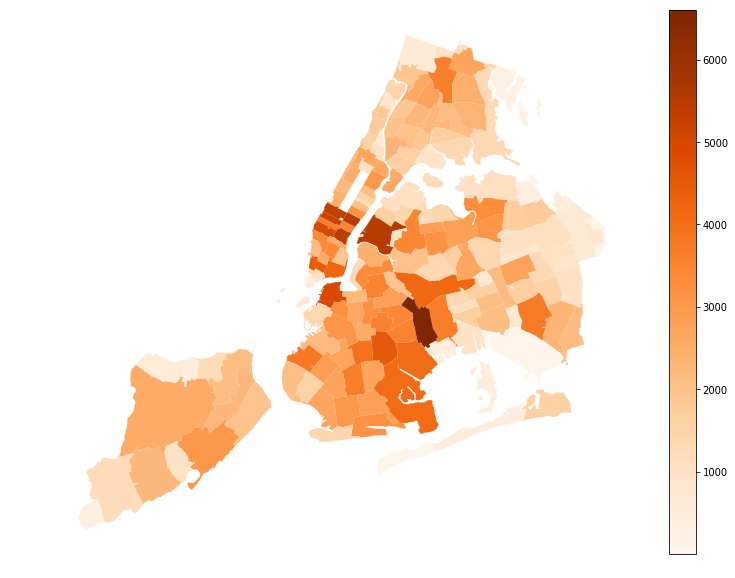

In [31]:
fig, ax = plt.subplots(figsize=(13,10))
ax.axis('off')
plotdata.plot(column='amount',legend=True, cmap='Oranges',ax=ax)

## Figure1:The distribution of motor vehicle collisions from 2012 to 2018 by zipcode
## The number of vehicle collisions happened in Lower Manhattan and Brooklyn downtown are larger than other areas.
